<a href="https://www.kaggle.com/code/samyakb/eda-feature-engineering-formula-building?scriptVersionId=170629371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Hello Everyone! I will be building a detailed regression model here!

In [1]:
import pandas as pd
train = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv', index_col='id')
test=pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv',index_col='id')
train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [3]:
train.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
train['Sex'].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [5]:
train['Rings'].value_counts()

Rings
9     17465
8     14499
10    12464
7      9008
11     8407
6      5411
12     4719
13     4074
5      2862
14     2507
15     2072
16     1439
4      1402
17     1175
18      848
19      639
20      507
3       386
21      255
23      180
22      108
27       41
2        29
24       29
1        25
29       24
25       22
26       18
Name: count, dtype: int64

Finding Outliers

<Axes: xlabel='Sex', ylabel='Rings'>

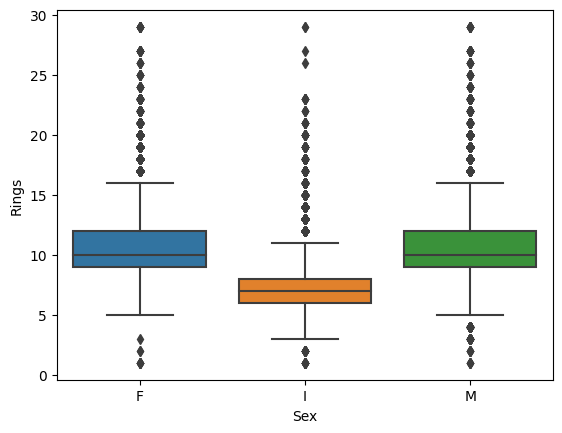

In [6]:
import seaborn as sns

sns.boxplot(x='Sex',y='Rings',data=train)

<Axes: xlabel='Rings', ylabel='Length'>

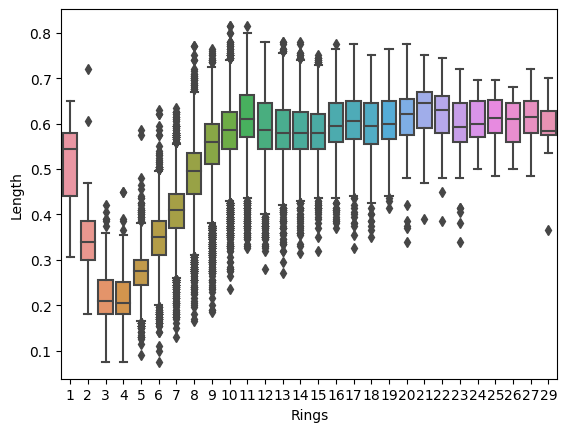

In [7]:
sns.boxplot(x='Rings',y='Length',data=train)

<Axes: xlabel='Rings', ylabel='Diameter'>

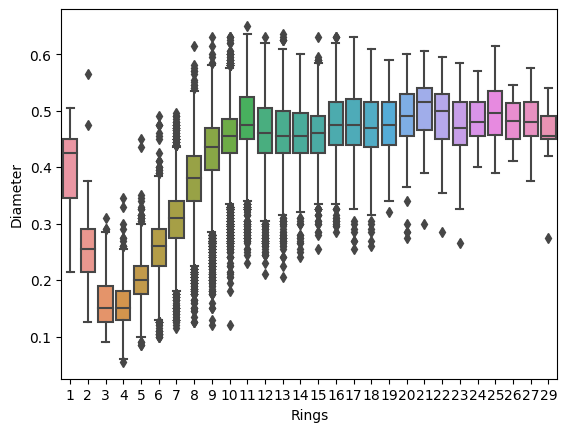

In [8]:
sns.boxplot(x='Rings',y='Diameter',data=train)

<Axes: xlabel='Rings', ylabel='Height'>

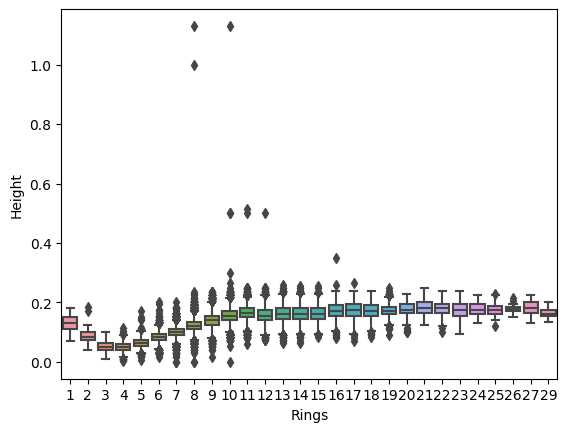

In [9]:
sns.boxplot(x='Rings',y='Height',data=train)

<Axes: xlabel='Rings', ylabel='Whole weight'>

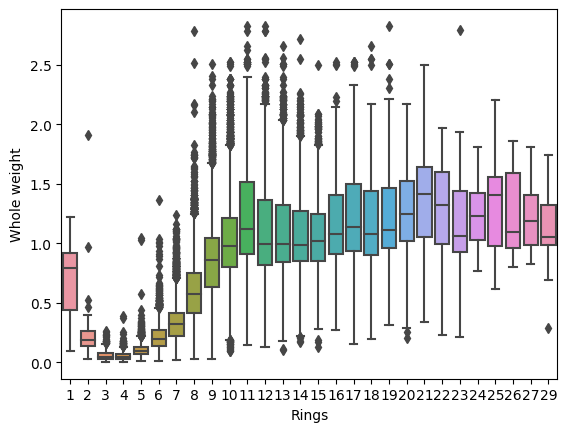

In [10]:
sns.boxplot(x='Rings',y='Whole weight',data=train)

<Axes: xlabel='Rings', ylabel='Whole weight.1'>

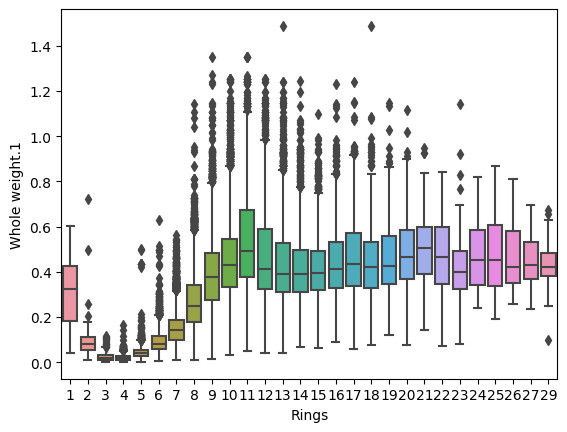

In [11]:
sns.boxplot(x='Rings',y='Whole weight.1',data=train)

<Axes: xlabel='Rings', ylabel='Whole weight.2'>

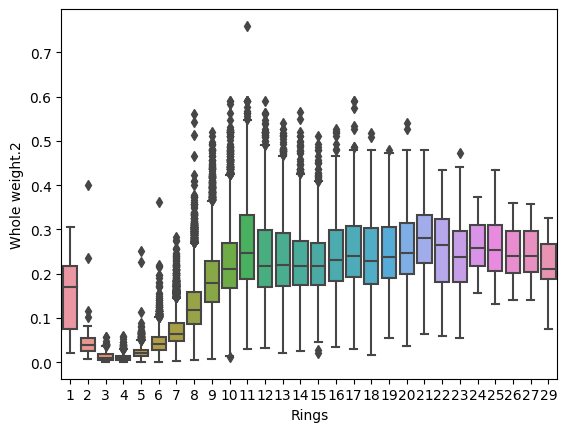

In [12]:
sns.boxplot(x='Rings',y='Whole weight.2',data=train)

<Axes: xlabel='Rings', ylabel='Shell weight'>

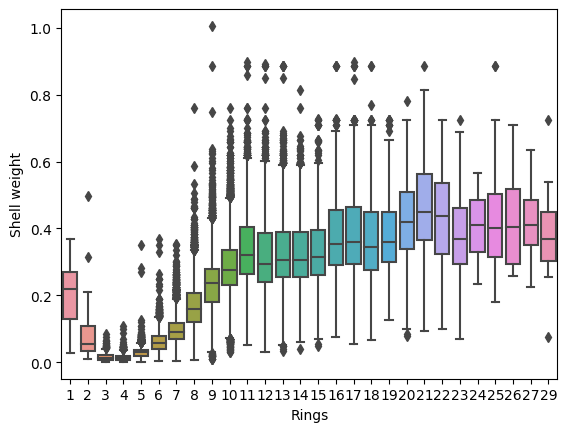

In [13]:
sns.boxplot(x='Rings',y='Shell weight',data=train)

In [14]:
from scipy import stats
import numpy as np
df_cols=['Height','Length','Diameter','Whole weight','Whole weight.1','Whole weight.2','Shell weight']


threshold = 3

for col in df_cols:
    z = np.abs(stats.zscore(train[col]))
    outliers = train[z > threshold]
    train = train[z <= threshold]

# Print the cleaned DataFrame
print(train)

      Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
id                                                                  
0       F   0.550     0.430   0.150        0.7715          0.3285   
1       F   0.630     0.490   0.145        1.1300          0.4580   
3       M   0.595     0.475   0.150        0.9145          0.3755   
4       I   0.555     0.425   0.130        0.7820          0.3695   
5       F   0.610     0.480   0.170        1.2010          0.5335   
...    ..     ...       ...     ...           ...             ...   
90610   M   0.335     0.235   0.075        0.1585          0.0685   
90611   M   0.555     0.425   0.150        0.8790          0.3865   
90612   I   0.435     0.330   0.095        0.3215          0.1510   
90613   I   0.345     0.270   0.075        0.2000          0.0980   
90614   I   0.425     0.325   0.100        0.3455          0.1525   

       Whole weight.2  Shell weight  Rings  
id                                          
0           

<Axes: xlabel='Rings', ylabel='Height'>

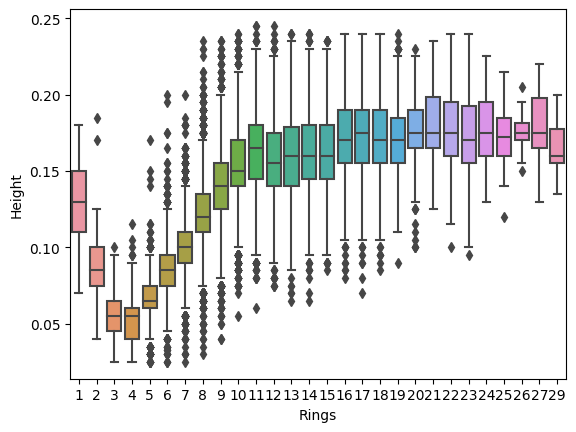

In [15]:
sns.boxplot(x='Rings',y='Height',data=train)

In [16]:
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
scaler = StandardScaler()
label_encoder = LabelEncoder()

cols_test=test.columns.tolist()
cols_test.remove('Sex')

train[cols_test]=scaler.fit_transform(train[cols_test])
test[cols_test] = scaler.transform(test[cols_test])

def preprocess(df):
    
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
    df=df.rename({'Whole weight':'Whole_weight'},axis=1)
    df=df.rename({'Whole weight.1':'Whole_weight1'},axis=1)
    df=df.rename({'Whole weight.2':'Whole_weight2'},axis=1)
    df=df.rename({'Shell weight':'Shell_weight'},axis=1)
    
    return df

train = preprocess(train)
test = preprocess(test)


In [17]:
train.dtypes


Length           float64
Diameter         float64
Height           float64
Whole_weight     float64
Whole_weight1    float64
Whole_weight2    float64
Shell_weight     float64
Rings              int64
Sex_1               bool
Sex_2               bool
dtype: object

In [18]:
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

manova = MANOVA.from_formula('Height+Length+Diameter+Whole_weight+Whole_weight1+Whole_weight2+Shell_weight ~ Rings',data=train)
print(manova.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.4238 7.0000 89166.0000 17319.2671 0.0000
         Pillai's trace 0.5762 7.0000 89166.0000 17319.2671 0.0000
 Hotelling-Lawley trace 1.3597 7.0000 89166.0000 17319.2671 0.0000
    Roy's greatest root 1.3597 7.0000 89166.0000 17319.2671 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
         Rings          Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.3997 7.0000 89166.0000 19134.4463 0.0000
         Pillai'

ANova

In [19]:
a1 = ols('Rings~Length*Diameter',data=train).fit()
first = sm.stats.anova_lm(a1,typ=1)
first

,df,sum_sq,mean_sq,F,PR(>F)
Length,1.0,332314.209396,332314.209396,56360.890924,0.000000e+00
Diameter,1.0,16139.873122,16139.873122,2737.341958,0.000000e+00
Length:Diameter,1.0,692.290769,692.290769,117.413350,2.423979e-27
Residual,89170.0,525762.768582,5.896184,NaN,NaN


In [20]:
train.columns.tolist()


['Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Whole_weight1',
 'Whole_weight2',
 'Shell_weight',
 'Rings',
 'Sex_1',
 'Sex_2']

<Axes: xlabel='Height', ylabel='Rings'>

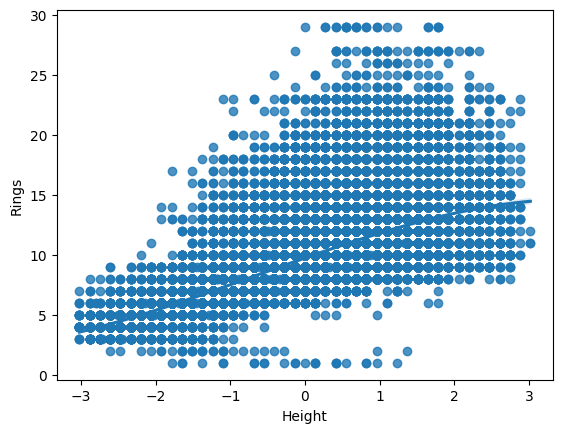

In [21]:
sns.regplot(data=train,x=train['Height'],y=train['Rings'],order=3)

In [22]:

fit = smf.ols('Rings ~ Sex_1+Height+Diameter+Length+Whole_weight1+Whole_weight*Whole_weight2*Shell_weight',train).fit()

print(fit.summary().tables[0])
print(fit.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:40:12   Log-Likelihood:            -1.8557e+05
No. Observations:               89174   AIC:                         3.712e+05
Df Residuals:                   89161   BIC:                         3.713e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [23]:
preds=fit.predict(test)
rounded_preds = np.round(preds).astype(int)
rounded_preds = np.array(rounded_preds)
rounded_preds

array([ 9, 10, 11, ..., 11, 13,  8])

In [24]:
output = pd.DataFrame({
    'id': test.index,
    'Rings': rounded_preds})
output

,id,Rings
0,90615,9
1,90616,10
2,90617,11
3,90618,10
4,90619,8
...,...,...
60406,151021,6
60407,151022,10
60408,151023,11
60409,151024,13


In [25]:
train['Rings'].value_counts()

Rings
9     17433
8     14490
10    12323
7      9001
11     8108
6      5392
12     4595
13     3970
5      2801
14     2451
15     2043
16     1379
4      1195
17     1105
18      808
19      610
20      477
3       318
21      226
23      175
22       95
27       39
2        29
24       29
1        25
29       23
25       18
26       16
Name: count, dtype: int64

In [26]:
output['Rings'].value_counts()

Rings
 10    10337
 11     8837
 9      8603
 8      6583
 7      6134
 12     5641
 6      4649
 13     3302
 5      1989
 14     1968
 15     1079
 16      589
 17      323
 18      167
 19       89
 20       37
 4        32
 21       16
-1        14
 23        5
 3         4
 22        4
 24        3
 27        2
 0         1
-2         1
 26        1
 1         1
Name: count, dtype: int64

In [27]:
output.to_csv('submission.csv',index_label='id')